# **MOCK EXAM**

# Mock Exam for NLP

## Part 1: Text Preprocessing and Exploration
*Using "Alice’s Adventures in Wonderland"*

**Task 1: Tokenization**
- Tokenize the text into words and sentences.

**Task 2: Text Cleaning**
- Remove special characters and punctuation; convert to lowercase.

**Task 3: Stopword Removal**
- Eliminate stopwords using NLTK's predefined list.

## Part 2: Text Analysis and Linguistic Features
*Using "The Adventures of Sherlock Holmes"*

**Task 4: Frequency Analysis**
- Calculate the frequency distribution of words; identify top 10 words.

**Task 5: Lexical Diversity**
- Measure the diversity of the text's vocabulary.

**Task 6: Collocations and N-grams**
- Find significant collocations; generate bigrams and trigrams.

## Part 3: Contextual Understanding and Visualization
*Using "Moby Dick"*

**Task 7: Concordance Analysis**
- Use concordance to study "whale" in its textual context.

**Task 8: Similar Words and Common Contexts**
- Find words with similar usage to "ship" and explore common contexts between "whale" and "sea".

**Task 9: Dispersion Plots**
- Visualize the occurrences of key maritime-related words throughout the text.

## Part 4: Advanced Text Processing Techniques
*Using a Sample Web Text such as "Firefox.txt"*

**Task 10: Stemming and Lemmatization**
- Compare the effects of these techniques on the text.

**Task 11: Part-of-Speech Tagging**
- Automatically tag words with their parts of speech.

**Task 12: Named Entity Recognition**
- Identify and categorize named entities using SpaCy.

## Part 5: Word Embeddings and Sentence Similarity
*Using SpaCy's "en_core_web_md" Model*

**Task 13: Exploring Word Vectors**
- Examine the vector representation of "queen" and "king".

**Task 14: Sentence Similarity**
- Compute the similarity between "I have a pet." and "Dogs are animals."

## Part 6: Machine Learning for NLP
*Using the SA Dataset for Sentiment Analysis*

**Task 15: Text Classification**
- Prepare data, train a model to classify positive and negative sentiments.

**Task 16: Model Evaluation**
- Use metrics such as accuracy, precision, recall, and F1-score to evaluate the model.

## Part 7: Text Generation with LSTM
*Using articles from the `text_generation_dataset` folder*

**Task 17: Data Preparation**
- Load the text data and preprocess it for the LSTM model.
- This involves tokenization and encoding the text into sequences.

**Task 18: Building the LSTM Model**
- Define and compile a simple LSTM model to predict the next character in a sequence.

**Task 19: Model Training**
- Train the LSTM model on the preprocessed text data.

**Task 20: Text Generation**
- Use the trained model to generate text.


## Data Loading and needed installations

In [1]:
import nltk
from nltk.corpus import webtext
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math 
import string
import re
import unicodedata
from collections import Counter

#!spacy download en_core_web_md


nltk.download('book')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('inaugural')
nltk.download('treebank')


firefox_text = webtext.raw('firefox.txt')
firefox_tokens = nltk.word_tokenize(firefox_text)

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /hhome/nlp2_g09/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /hhome/nlp2_g09/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /hhome/nlp2_g09/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /hhome/nlp2_g09/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /hhome/nlp2_g09/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /hhome/nlp2_g09/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data

### Load data

In [2]:

# "Alice’s Adventures in Wonderland"
with open('./exam_data/alice.txt', 'r', encoding='utf-8') as file:
    alice_text = file.read()

# "The Adventures of Sherlock Holmes"
with open('./exam_data/Adventures_Holmes.txt', 'r', encoding='utf-8') as file:
    holmes_text = file.read()

# "moby_dick"
with open('./exam_data/moby_dick.txt', 'r', encoding='utf-8') as file:
    moby_dick_text = file.read()
    
#Firefox.txt
firefox_text = webtext.raw('firefox.txt')

    
# Alexa Reviews
with open('./exam_data/alexa_reviews.tsv', 'r', encoding='utf-8') as file:
    alexa_reviews = file.readlines()

# SA (Sentiment Analysis) Dataset
import pandas as pd
sa_dataset = pd.read_csv('./exam_data/SA_dataset.csv', delimiter=',')

# Text Generation Dataset
text_generation_dataset = []
text_generation_dataset_path = "./exam_data/text_generation_dataset/"

# Ensure the directory exists
if os.path.exists(text_generation_dataset_path):
    # Iterate over each file in the directory
    for article_filename in os.listdir(text_generation_dataset_path):
        # Construct the full file path
        article_path = os.path.join(text_generation_dataset_path, article_filename)
        # Check if it's a file and not a directory
        if os.path.isfile(article_path):
            # Open and read the contents of the file
            try:
                with open(article_path, 'r', encoding='utf-8') as file:
                    articles_text = file.read()
                    text_generation_dataset.append(articles_text)
            except Exception as e:
                print(f"Error reading {article_path}: {e}")

#Print info of the datasets just to check if they are loaded correctly
print(f"Firefox text: {len(firefox_text)} characters")
print(f"Alice text: {len(alice_text)} characters")
print(f"Sherlock Holmes text: {len(holmes_text)} characters")
print(f"Moby dick text: {len(moby_dick_text)} characters")
print(f"Firefox text: {len(firefox_text)} characters")
print(f"Alexa reviews: {len(alexa_reviews)} lines")
print(f"SA dataset: {len(sa_dataset)} rows")
print(f"Text generation dataset: {len(text_generation_dataset)} articles")

Firefox text: 564601 characters
Alice text: 163815 characters
Sherlock Holmes text: 580632 characters
Moby dick text: 1238254 characters
Firefox text: 564601 characters
Alexa reviews: 3151 lines
SA dataset: 5000 rows
Text generation dataset: 9 articles



## **Part 1: Text Preprocessing and Exploration**
*Using "Alice’s Adventures in Wonderland"*

**Task 1: Tokenization**
- Tokenize the text into words and sentences.

**Task 2: Text Cleaning**
- Remove special characters and punctuation; convert to lowercase.

**Task 3: Stopword Removal**
- Eliminate stopwords using NLTK's predefined list.

**Additional Task: Compute Basic Text Statistics and Lexical Diversity**


#### Task 1: Tokenization

In [3]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string


# Tokenize the text into words and sentences
alice_words = word_tokenize(alice_text)
alice_sentences = sent_tokenize(alice_text)
print(f"Number of words: {len(alice_words)}")
print(f"Number of sentences: {len(alice_sentences)}")


Number of words: 38349
Number of sentences: 1093


#### Task 2: Text Cleaning

In [4]:


# Remove special characters and punctuation; convert to lowercase
translator = str.maketrans('', '', string.punctuation)
alice_words_clean = [word.translate(translator).lower() for word in alice_words if word.isalpha()]
print(f"Total number of words before cleaning: {len(alice_words)}")
print(f"Total number of words after cleaning: {len(alice_words_clean)}")
print(f"Sample words after cleaning: {alice_words_clean[:100]}")


Total number of words before cleaning: 38349
Total number of words after cleaning: 29744
Sample words after cleaning: ['project', 'gutenberg', 's', 'alice', 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'title', 'alice', 's', 'adventures', 'in', 'wonderland', 'author', 'lewis', 'carroll', 'posting', 'date', 'june', 'ebook', 'release', 'date', 'march', 'last', 'updated', 'october', 'language', 'english', 'character', 'set', 'encoding', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'alice', 's', 'adventures', 'in', 'wonderland', 'alice', 's', 'adventures', 'in', 'wonderland', 'lewis', 'carroll', 'the', 'millennium', 'f

#### Task 3: Stopword Removal

In [5]:


# Eliminate stopwords using NLTK's predefined list
stop_words = set(stopwords.words('english'))
alice_words_final = [word for word in alice_words_clean if word not in stop_words]
print(f"Total number of words before stopword removal: {len(alice_words_clean)}")
print(f"Total number of words after stopword removal: {len(alice_words_final)}")
print(f"Sample words after stopword removal: {alice_words_final[:100]}")


Total number of words before stopword removal: 29744
Total number of words after stopword removal: 13446
Sample words after stopword removal: ['project', 'gutenberg', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'title', 'alice', 'adventures', 'wonderland', 'author', 'lewis', 'carroll', 'posting', 'date', 'june', 'ebook', 'release', 'date', 'march', 'last', 'updated', 'october', 'language', 'english', 'character', 'set', 'encoding', 'start', 'project', 'gutenberg', 'ebook', 'alice', 'adventures', 'wonderland', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'chapter', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thoug

#### Additional Task: Compute Basic Text Statistics and Lexical Diversity

In [6]:


# Total number of words
total_words = len(alice_words_final)
# Number of unique words
unique_words = len(set(alice_words_final))
# Lexical diversity
lexical_diversity = unique_words / total_words
print(f"Total number of words: {total_words}")
print(f"Number of unique words: {unique_words}")
print(f"Lexical Diversity: {lexical_diversity}")

Total number of words: 13446
Number of unique words: 2772
Lexical Diversity: 0.20615796519410978



---------------------------------------------------------


## **Part 2: Text Analysis and Linguistic Features**
*Using "The Adventures of Sherlock Holmes"*

**Task 4: Frequency Analysis**
- Calculate the frequency distribution of words; identify top 10 words.

**Task 5: Lexical Diversity**
- Measure the diversity of the text's vocabulary.

**Task 6: Collocations and N-grams**
- Find significant collocations; generate bigrams and trigrams.



#### Task 4: Frequency Analysis


In [7]:
# Import necessary libraries
from nltk import FreqDist, bigrams, trigrams, collocations
import matplotlib.pyplot as plt

# Preprocessing: Tokenization and cleaning
holmes_tokens = [word.lower() for word in word_tokenize(holmes_text) if word.isalpha()]

# Calculate the frequency distribution of words and identify top 10 words
fdist = FreqDist(holmes_tokens)
top_10_words = fdist.most_common(10)
print("Top 10 most common words:", top_10_words)

Top 10 most common words: [('the', 5791), ('and', 3064), ('i', 3026), ('of', 2767), ('to', 2759), ('a', 2680), ('in', 1814), ('that', 1752), ('it', 1699), ('you', 1528)]


#### Task 5: Lexical Diversity

In [8]:
# Measure the diversity of the text's vocabulary
total_words = len(holmes_tokens)
unique_words = len(set(holmes_tokens))
lexical_diversity = unique_words / total_words
print(f"Lexical Diversity: {lexical_diversity}")

Lexical Diversity: 0.07385822572658363



#### Task 6: Collocations and N-grams

In [9]:
# Find significant collocations
bigram_measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(holmes_tokens)
significant_collocations = finder.nbest(bigram_measures.pmi, 10)  # top 10
print("Significant Collocations:", significant_collocations)

# Generate bigrams and trigrams
generated_bigrams = list(bigrams(holmes_tokens))
generated_trigrams = list(trigrams(holmes_tokens))
print("Sample Bigrams:", generated_bigrams[:10])
print("Sample Trigrams:", generated_trigrams[:10])

Significant Collocations: [('abusive', 'expressions'), ('accepting', 'unsolicited'), ('alicia', 'whittington'), ('alley', 'lurking'), ('alteration', 'modification'), ('amply', 'repaid'), ('anatomy', 'unsystematic'), ('apache', 'indians'), ('arnsworth', 'castle'), ('atkinson', 'brothers')]
Sample Bigrams: [('adventures', 'of'), ('of', 'sherlock'), ('sherlock', 'holmes'), ('holmes', 'by'), ('by', 'arthur'), ('arthur', 'conan'), ('conan', 'doyle'), ('doyle', 'contents'), ('contents', 'i'), ('i', 'a')]
Sample Trigrams: [('adventures', 'of', 'sherlock'), ('of', 'sherlock', 'holmes'), ('sherlock', 'holmes', 'by'), ('holmes', 'by', 'arthur'), ('by', 'arthur', 'conan'), ('arthur', 'conan', 'doyle'), ('conan', 'doyle', 'contents'), ('doyle', 'contents', 'i'), ('contents', 'i', 'a'), ('i', 'a', 'scandal')]


#### Extra Task: Visualize Frequency Distribution

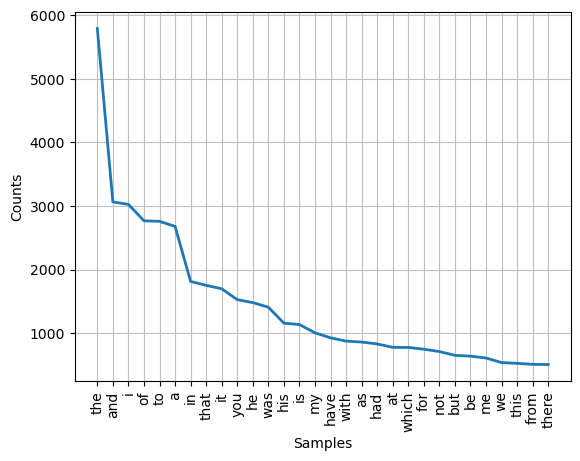

In [10]:
# Plot the frequency distribution of the top 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

-----------------------------------

## **Part 3: Contextual Understanding and Visualization**
*Using "Moby Dick"*

**Task 7: Concordance Analysis**
- Use concordance to study "whale" in its textual context.

**Task 8: Similar Words and Common Contexts**
- Find words with similar usage to "ship" and explore common contexts between "whale" and "sea".

**Task 9: Dispersion Plots**
- Visualize the occurrences of key maritime-related words throughout the text.




In [11]:
# Import necessary libraries
from nltk.text import Text

# Preprocessing: Tokenization and Text object creation
moby_tokens = word_tokenize(moby_dick_text.lower())
moby_nltk_text = Text(moby_tokens)

#### Task 7: Concordance Analysis

In [12]:
# Use concordance to study "whale" in its textual context
moby_nltk_text.concordance("whale")



Displaying 25 of 1075 matches:
utenberg ebook of moby dick ; or the whale , by herman melville this ebook is f
nberg.org title : moby dick ; or the whale author : herman melville release dat
t gutenberg ebook moby dick ; or the whale * * * produced by daniel lazarus , j
nd david widger moby-dick ; or , the whale . by herman melville contents etymol
k . chapter 42. the whiteness of the whale . chapter 43. hark ! chapter 44. the
the line . chapter 61. stubb kills a whale . chapter 62. the dart . chapter 63.
. stubb ’ s supper . chapter 65. the whale as a dish . chapter 66. the shark ma
ter 73. stubb and flask kill a right whale ; and then have a talk over him . ch
alk over him . chapter 74. the sperm whale ’ s head—contrasted view . chapter 7
trasted view . chapter 75. the right whale ’ s head—contrasted view . chapter 7
es . chapter 103. measurement of the whale ’ s skeleton . chapter 104. the foss
s skeleton . chapter 104. the fossil whale . chapter 105. does the whale ’ s ma
fossil wh

In [13]:
# Use concordance to study "intelligence" in its textual context
moby_nltk_text.concordance("intelligence")

Displaying 7 of 7 matches:
ather to spring , somehow , from intelligence than from ignorance . outward po
e instinct—say , rather , secret intelligence from the deity—mostly swim in _v
would receive the latest whaling intelligence from the cruising-ground to whic
 made . greedily sucking in this intelligence , gabriel solemnly warned the ca
c part of him as the seat of his intelligence . it is plain , then , that phre
 argue some uncommon vivacity of intelligence . but not precisely so . for not
 moby dick , with that malicious intelligence ascribed to him , sidelingly tra


#### Task 8: Similar Words and Common Contexts

In [14]:
# Find words with similar usage to "ship"
print("Words similar to 'ship':")
moby_nltk_text.similar("ship")

# Explore common contexts between "whale" and "sea"
print("Common contexts for 'whale' and 'sea':")
moby_nltk_text.common_contexts(["whale", "sea"])


Words similar to 'ship':
whale boat sea world captain crew man pequod head way time line deck
other body water boats air devil side
Common contexts for 'whale' and 'sea':
the_is the_and the_the the_as the_in the_was the_i the_by the_which
the_when the_so the_all the_had the_with the_to the_chapter the_that
the_a the_but the_of


#### Task 9: Dispersion Plots

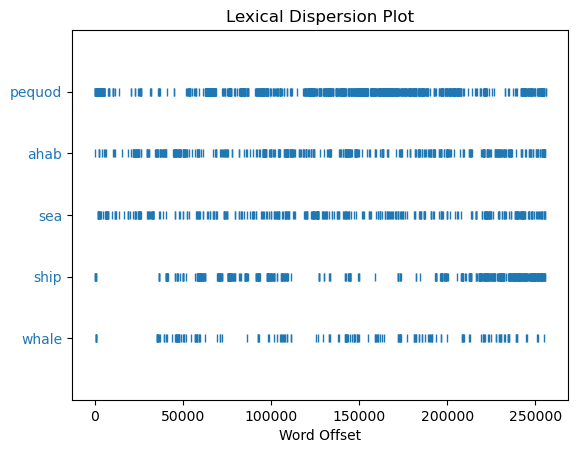

In [15]:
# Visualize the occurrences of key maritime-related words throughout the text
words_of_interest = ["whale", "ship", "sea", "ahab", "pequod"]
moby_nltk_text.dispersion_plot(words_of_interest)

#### Extra Task: Content Analysis

In [16]:
# Count the mention of key thematic words and analyze their significance
thematic_words = ['whale', 'ship', 'sea', 'ahab', 'pequod', 'ocean']
word_freq = FreqDist(moby_nltk_text)
thematic_word_counts = {word: word_freq[word] for word in thematic_words}
print("Thematic word counts:", thematic_word_counts)

Thematic word counts: {'whale': 1075, 'ship': 460, 'sea': 375, 'ahab': 494, 'pequod': 175, 'ocean': 70}


-------------------------------------------------------------


## **Part 4: Advanced Text Processing Techniques**
*Using a Sample Web Text such as "Firefox.txt"*

**Task 10: Stemming and Lemmatization**
- Compare the effects of these techniques on the text.

**Task 11: Part-of-Speech Tagging**
- Automatically tag words with their parts of speech.

**Task 12: Named Entity Recognition**
- Identify and categorize named entities using SpaCy.

In [17]:
# Import necessary libraries
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
import spacy

# Load SpaCy's English tokenizer
nlp = spacy.load('en_core_web_md')

# Preprocessing: Tokenization
firefox_tokens = word_tokenize(firefox_text.lower())


#### Task 10: Stemming and Lemmatization

In [18]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming and lemmatization
stems = [stemmer.stem(token) for token in firefox_tokens]
lemmas = [lemmatizer.lemmatize(token) for token in firefox_tokens]

print("Sample stems:", stems[:20])
print("Sample lemmas:", lemmas[:20])


Sample stems: ['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set', 'remov', 'cooki', 'to', 'set', 'futur', 'cooki', "''", 'should', 'stay', 'check']
Sample lemmas: ['cookie', 'manager', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set', 'removed', 'cooky', 'to', 'set', 'future', 'cooky', "''", 'should', 'stay', 'checked']


#### Task 11: Part-of-Speech Tagging

In [19]:
# Automatically tag words with their parts of speech
pos_tags = pos_tag(firefox_tokens)
print("Sample POS tags:", pos_tags[:20])

Sample POS tags: [('cookie', 'NN'), ('manager', 'NN'), (':', ':'), ('``', '``'), ('do', 'VBP'), ("n't", 'RB'), ('allow', 'VB'), ('sites', 'NNS'), ('that', 'WDT'), ('set', 'VBP'), ('removed', 'VBN'), ('cookies', 'NNS'), ('to', 'TO'), ('set', 'VB'), ('future', 'JJ'), ('cookies', 'NNS'), ("''", "''"), ('should', 'MD'), ('stay', 'VB'), ('checked', 'VBD')]


#### Task 12: Named Entity Recognition

In [20]:
# Identify and categorize named entities using SpaCy
doc = nlp(firefox_text)
named_entities = [(entity.text, entity.label_) for entity in doc.ents]
print("Sample Named Entities:", named_entities[:20])

Sample Named Entities: [('Phoenix', 'GPE'), ('UI', 'ORG'), ('Mozilla', 'ORG'), ('second', 'ORDINAL'), ('Phoenix', 'GPE'), ('Mozilla', 'ORG'), ('Phoenix', 'GPE'), ('Satchel', 'PERSON'), ('Mousing', 'ORG'), ('second', 'ORDINAL'), ('ptoolbar', 'GPE'), ('Customising', 'GPE'), ('160019', 'CARDINAL'), ('Quick Launch (Turbo', 'PRODUCT'), ('URLbar', 'ORG'), ('second', 'ORDINAL'), ('the Navigation Toolbar', 'ORG'), ('Uabar', 'ORG'), ('Theme', 'ORG'), ('Options', 'ORG')]


#### Extra Task: Dependency Parsing

In [21]:
# Analyze the sentence structure using dependency parsing
sample_sentence = list(doc.sents)[0]
dependencies = [(token.text, token.dep_, token.head.text) for token in sample_sentence]
print("Dependencies in the first sentence:", dependencies)

Dependencies in the first sentence: [('Cookie', 'compound', 'Manager'), ('Manager', 'dep', 'allow'), (':', 'punct', 'Manager'), ('"', 'punct', 'allow'), ('Do', 'aux', 'allow'), ("n't", 'neg', 'allow'), ('allow', 'ROOT', 'allow'), ('sites', 'dobj', 'allow'), ('that', 'nsubj', 'set'), ('set', 'relcl', 'sites'), ('removed', 'amod', 'cookies'), ('cookies', 'dobj', 'set'), ('to', 'aux', 'set'), ('set', 'advcl', 'set'), ('future', 'amod', 'cookies'), ('cookies', 'dobj', 'set'), ('"', 'punct', 'sites'), ('should', 'aux', 'stay'), ('stay', 'ccomp', 'allow'), ('checked', 'acomp', 'stay'), ('\r\n', 'dep', 'checked')]



## **Part 5: Word Embeddings and Sentence Similarity**
*Using SpaCy's "en_core_web_md" Model*

**Task 13: Exploring Word Vectors**
- Examine the vector representation of "queen" and "king".

**Task 14: Sentence Similarity**
- Compute the similarity between "I have a pet." and "Dogs are animals."

In [22]:
# Import necessary libraries
import spacy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load SpaCy's English model
nlp = spacy.load('en_core_web_md')

#### Task 13: Exploring Word Vectors

In [23]:
# Examine the vector representation of "queen" and "king"
queen = nlp("queen")
king = nlp("king")

print("Vector for 'queen':", queen.vector[:5])  # Display first 5 elements for brevity
print("Vector for 'king':", king.vector[:5])    # Display first 5 elements for brevity

#Compute the similarity between "queen" and "king"
similarity = queen.similarity(king)
print("Similarity between 'queen' and 'king':",str(similarity*100)+"%")


Vector for 'queen': [ 2.167    0.29991 -3.1277  -2.7817  -0.26743]
Vector for 'king': [-0.11296 -4.1865  -1.8453   0.30781  2.4956 ]
Similarity between 'queen' and 'king': 61.08841234425123%


#### Task 14: Sentence Similarity

In [24]:
# Compute the similarity between "I have a pet." and "Dogs are animals."
sentence1 = nlp("I have a pet.")
sentence2 = nlp("Dogs are animals.")
similarity_score = sentence1.similarity(sentence2)
print("Similarity between sentences:", similarity_score)

Similarity between sentences: 0.4070589692292363


In [25]:
# Compute the similarity between "I have a pet." and "We enjoy nlp."
sentence1 = nlp("I have a pet.")
sentence2 = nlp("We enjoy nlp.")
similarity_score = sentence1.similarity(sentence2)
print("Similarity between sentences:", similarity_score)

Similarity between sentences: 0.6292748338239498


#### Extra Task: Clustering Word Vectors

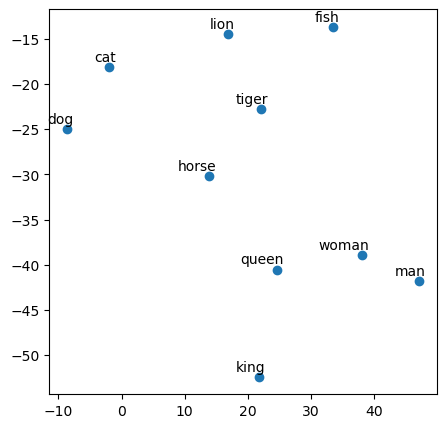

In [26]:
# To visualize semantic relationships, let's perform a clustering of selected word vectors

words = ["dog", "cat", "fish", "horse", "lion", "tiger", "queen", "king", "woman", "man"]
word_vectors = [nlp(word).vector for word in words]

# Convert list of vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting the results
plt.figure(figsize=(5, 5))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()


## **Part 6: Machine Learning for NLP**
*Using the SA Dataset for Sentiment Analysis*

**Task 15: Text Classification**
- Prepare data, train a model to classify positive and negative sentiments.

**Task 16: Model Evaluation**
- Use metrics such as accuracy, precision, recall, and F1-score to evaluate the model.


In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Preprocessing: Extract features and labels
X = sa_dataset['Review']
y = sa_dataset['Sentiment']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


#### Task 15: Text Classification

In [28]:
# Train a Naive Bayes classifier
model1 = MultinomialNB()
model1.fit(X_train, y_train)

model2 = SVC(kernel='linear')
model2 = model2.fit(X_train, y_train)

#### Task 16: Model Evaluation

In [29]:
# Predict sentiments for test data
y_pred_NB = model1.predict(X_test)
y_pred_SVC = model2.predict(X_test)

# Calculate performance metrics
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)

precision_NB = precision_score(y_test, y_pred_NB, pos_label=1)
precision_SVC = precision_score(y_test, y_pred_SVC)

recall_NB = recall_score(y_test, y_pred_NB, pos_label=1)
recall_SVC = recall_score(y_test, y_pred_SVC, pos_label=1)

f1_NB = f1_score(y_test, y_pred_NB, pos_label=1)
f1_SVC = f1_score(y_test, y_pred_SVC, pos_label=1)

print(f"Accuracy NB: {accuracy_NB}")
print(f"Accuracy SVC: {accuracy_SVC}\n")

print(f"Precision NB: {precision_NB}")
print(f"Precision SVC: {precision_SVC}\n")

print(f"Recall NB: {recall_NB}")
print(f"Recall SVC: {recall_SVC}\n")

print(f"F1 Score NB: {f1_NB}")
print(f"F1 Score SVC: {f1_SVC}\n")


Accuracy NB: 0.861
Accuracy SVC: 0.839

Precision NB: 0.8930693069306931
Precision SVC: 0.8803245436105477

Recall NB: 0.8414179104477612
Recall SVC: 0.8097014925373134

F1 Score NB: 0.866474543707973
F1 Score SVC: 0.8435374149659863




## **Part 7: Text Generation with LSTM**
*Using articles from the `text_generation_dataset` folder*

**Task 17: Data Preparation**
- Load the text data and preprocess it for the LSTM model.
- This involves tokenization and encoding the text into sequences.

**Task 18: Building the LSTM Model**
- Define and compile a simple LSTM model to predict the next character in a sequence.

**Task 19: Model Training**
- Train the LSTM model on the preprocessed text data.

**Task 20: Text Generation**
- Use the trained model to generate text.


In [30]:
import os
import pandas as pd
from pathlib import Path

# Define the path to the text_generation_dataset folder
dataset_path = Path('./exam_data/text_generation_dataset')

# Load all CSV files in the directory
all_articles = []
for file_name in os.listdir(dataset_path):
    if file_name.endswith('.csv'):
        file_path = dataset_path / file_name
        # Assuming the text content is in a column named 'content'
        articles = pd.read_csv(file_path)
        all_articles.append(articles)

# Combine all articles into a single series
combined_articles = pd.concat(all_articles).reset_index(drop=True)

In [40]:
combined_articles

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58def1347c459f24986d7c80,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,One of the largest photo displays in Times his...,The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
1,NaN,58def3237c459f24986d7c84,823,By GAIL COLLINS,article,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",3,OpEd,23,2017-04-01 00:23:58,Unknown,Meet the gang from under the bus.,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/31/opinion/and...
2,NaN,58def9f57c459f24986d7c90,575,By THE EDITORIAL BOARD,article,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",3,Editorial,22,2017-04-01 00:53:06,Unknown,A court ruling annulling the legislature’s aut...,The New York Times,Editorial,https://www.nytimes.com/2017/03/31/opinion/ven...
3,NaN,58defd317c459f24986d7c95,1374,By MICHAEL POWELL,article,Stain Permeates Basketball Blue Blood,"['Basketball (College)', 'University of North ...",3,Sports,1,2017-04-01 01:06:52,College Basketball,"For two decades, until 2013, North Carolina en...",The New York Times,News,https://www.nytimes.com/2017/03/31/sports/ncaa...
4,NaN,58df09b77c459f24986d7ca7,708,By DEB AMLEN,article,Taking Things for Granted,['Crossword Puzzles'],3,Games,0,2017-04-01 02:00:14,Unknown,In which Howard Barkin and Will Shortz teach u...,The New York Times,News,https://www.nytimes.com/2017/03/31/crosswords/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9330,NaN,593087d17c459f24986e2ed8,609,By DEB AMLEN,article,"Yes, You Can Write More Than One Letter in a S...",['Crossword Puzzles'],65,Games,0,2017-06-01 21:31:55,Unknown,Rebuses are crossword elements where solvers a...,The New York Times,News,https://www.nytimes.com/2017/06/01/crosswords/...
9331,NaN,59308fdc7c459f24986e2ef2,797,By PAUL KRUGMAN,article,Trump’s Act Of Gratuitous Destruction,"['United States Economy', 'United Nations Fram...",3,OpEd,25,2017-06-01 22:06:15,Unknown,"To the president and the right, it’s all about...",The New York Times,Op-Ed,https://www.nytimes.com/2017/06/01/opinion/tru...
9332,NaN,5930a48f7c459f24986e2f24,945,By GINIA BELLAFANTE,article,"Petty Crime, Daunting Bail","['Bail', 'Robberies and Thefts', 'Poverty', 'L...",3,Metropolitan,1,2017-06-01 23:34:14,Unknown,Using conflict resolution and social services ...,The New York Times,News,https://www.nytimes.com/2017/06/01/nyregion/ge...
9333,NaN,5930aa877c459f24986e2f2a,141,By BARBARA BOLTON,article,Unknown,"['Bay Ridge (Brooklyn, NY)']",0,Metro,22,2017-06-02 00:00:04,Unknown,A bus rider wants a tale to conclude before he...,The New York Times,News,https://www.nytimes.com/2017/06/01/nyregion/me...


In [33]:
print(combined_articles)

     abstract                 articleID  articleWordCount  \
0         NaN  58def1347c459f24986d7c80               716   
1         NaN  58def3237c459f24986d7c84               823   
2         NaN  58def9f57c459f24986d7c90               575   
3         NaN  58defd317c459f24986d7c95              1374   
4         NaN  58df09b77c459f24986d7ca7               708   
...       ...                       ...               ...   
9330      NaN  593087d17c459f24986e2ed8               609   
9331      NaN  59308fdc7c459f24986e2ef2               797   
9332      NaN  5930a48f7c459f24986e2f24               945   
9333      NaN  5930aa877c459f24986e2f2a               141   
9334      NaN  5930ae877c459f24986e2f33              1176   

                                    byline documentType  \
0      By STEPHEN HILTNER and SUSAN LEHMAN      article   
1                          By GAIL COLLINS      article   
2                   By THE EDITORIAL BOARD      article   
3                        By MIC